# 9 Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [10]:
#Package Import
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
from sklearn import metrics
from sklearn.cluster import DBSCAN
import numpy as np
from tqdm import tqdm

In [12]:
#Dataset import
X = pd.read_csv(r'C:\Users\carlb\Desktop\mlnn\data\3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X

,osm,lat,lon,alt
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974
5,144552912,9.351475,56.740502,19.124889
6,144552912,9.352127,56.740558,19.590593
7,144552912,9.352420,56.740597,19.621764
8,144552912,9.352584,56.740629,19.659931
9,144552912,9.352726,56.740663,19.490670


In [4]:
#Normalize sample from dataset
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [5]:
#eps loop 0.05 to 0.5 (steps 0.01) min_samples=10

eps_range = [x / 100.0 for x in range(5,51,1)]
eps_scores_10 = []
for e in tqdm(eps_range):
    dbscan = DBSCAN(eps=e, min_samples=10)
    labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
    eps_scores_10.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [01:57<00:00,  2.62s/it]


In [5]:
#eps loop 0.05 to 0.5 (steps 0.01) min_samples=9

eps_range = [x / 100.0 for x in range(5,51,1)]
eps_scores_9 = []
for e in tqdm(eps_range):
    dbscan = DBSCAN(eps=e, min_samples=9)
    labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
    eps_scores_9.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

100%|███████████████████████████████████████████████| 46/46 [19:50<00:00, 25.80s/it]


In [6]:
#eps loop 0.05 to 0.5 (steps 0.01) min_samples=8

eps_range = [x / 100.0 for x in range(5,51,1)]
eps_scores_8 = []
for e in tqdm(eps_range):
    dbscan = DBSCAN(eps=e, min_samples=8)
    labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
    eps_scores_8.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

100%|███████████████████████████████████████████████| 46/46 [19:46<00:00, 25.75s/it]


In [7]:
#eps loop 0.05 to 0.5 (steps 0.01) min_samples=7

eps_range = [x / 100.0 for x in range(5,51,1)]
eps_scores_7 = []
for e in tqdm(eps_range):
    dbscan = DBSCAN(eps=e, min_samples=7)
    labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
    eps_scores_7.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

100%|███████████████████████████████████████████████| 46/46 [19:53<00:00, 25.79s/it]


In [8]:
#eps loop 0.05 to 0.5 (steps 0.01) min_samples=6

eps_range = [x / 100.0 for x in range(5,51,1)]
eps_scores_6 = []
for e in tqdm(eps_range):
    dbscan = DBSCAN(eps=e, min_samples=6)
    labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
    eps_scores_6.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

100%|███████████████████████████████████████████████| 46/46 [20:18<00:00, 25.77s/it]


In [9]:
#eps loop 0.05 to 0.5 (steps 0.01) min_samples=5

eps_range = [x / 100.0 for x in range(5,51,1)]
eps_scores_5 = []
for e in tqdm(eps_range):
    dbscan = DBSCAN(eps=e, min_samples=5)
    labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
    eps_scores_5.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

100%|███████████████████████████████████████████████| 46/46 [20:59<00:00, 25.79s/it]


In [10]:
#eps loop 0.05 to 0.5 (steps 0.01) min_samples=4

eps_range = [x / 100.0 for x in range(5,51,1)]
eps_scores_4 = []
for e in tqdm(eps_range):
    dbscan = DBSCAN(eps=e, min_samples=4)
    labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
    eps_scores_4.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

100%|███████████████████████████████████████████████| 46/46 [22:22<00:00, 25.74s/it]


In [11]:
#eps loop 0.05 to 0.5 (steps 0.01) min_samples=3

eps_range = [x / 100.0 for x in range(5,51,1)]
eps_scores_3 = []
for e in tqdm(eps_range):
    dbscan = DBSCAN(eps=e, min_samples=3)
    labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
    eps_scores_3.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

100%|███████████████████████████████████████████████| 46/46 [25:36<00:00, 25.60s/it]


In [12]:
#eps loop 0.05 to 0.5 (steps 0.01) min_samples=2

eps_range = [x / 100.0 for x in range(5,51,1)]
eps_scores_2 = []
for e in tqdm(eps_range):
    dbscan = DBSCAN(eps=e, min_samples=2)
    labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
    eps_scores_2.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

100%|███████████████████████████████████████████████| 46/46 [37:05<00:00, 25.90s/it]


In [13]:
#eps loop 0.05 to 0.5 (steps 0.01) min_samples=1

eps_range = [x / 100.0 for x in range(5,51,1)]
eps_scores_1 = []
for e in tqdm(eps_range):
    dbscan = DBSCAN(eps=e, min_samples=1)
    labels = dbscan.fit_predict(XX[['lon', 'lat', 'alt']])
    eps_scores_1.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))

100%|█████████████████████████████████████████████| 46/46 [1:44:29<00:00, 25.75s/it]


In [7]:
#make blank df for figure
index = [x / 100.0 for x in range(5,51,1)]
columns = ['one','two','three','four','five','six','seven','eight','nine','ten']
fig_df = pd.DataFrame(index=index, columns=columns)

In [8]:
#insert silhouette scores into df
#fig_df['one'] = eps_scores_1
#fig_df['two'] = eps_scores_2
#fig_df['three'] = eps_scores_3
#fig_df['four'] = eps_scores_4
#fig_df['five'] = eps_scores_5
#fig_df['six'] = eps_scores_6
#fig_df['seven'] = eps_scores_7
#fig_df['eight'] = eps_scores_8
#fig_df['nine'] = eps_scores_9
fig_df['ten'] = eps_scores_10

<IPython.core.display.Javascript object>


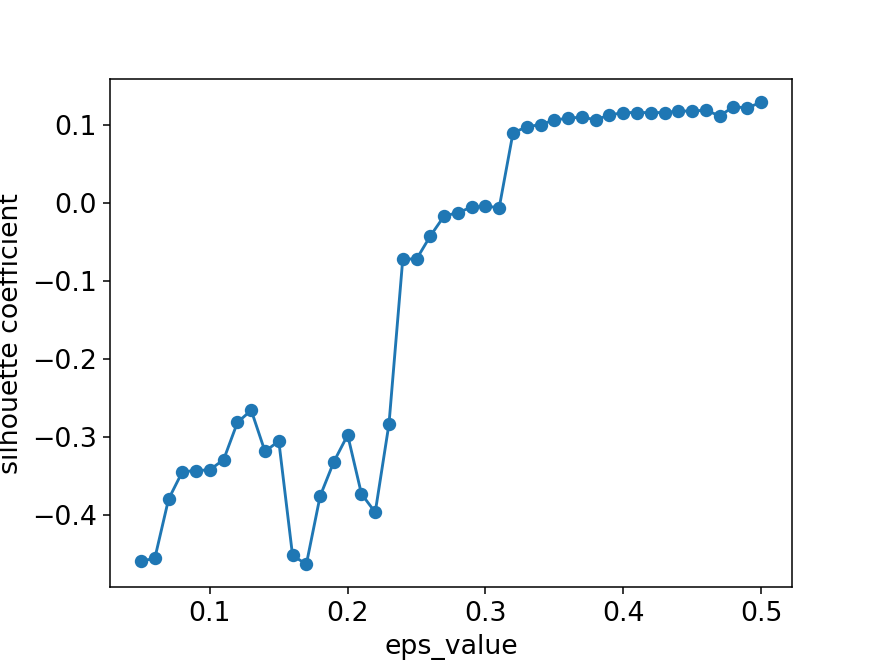

In [9]:
#line plot of multiple scores
#plt.plot(fig_df['one'], '-o', label='min_smpl_one')
#plt.plot(fig_df['two'], '-o', label='min_smpl_two')
#plt.plot(fig_df['three'], '-o', label='min_smpl_three')
#plt.plot(fig_df['four'], '-o', label='min_smpl_four')
#plt.plot(fig_df['five'], '-o', label='min_smpl_five')
#plt.plot(fig_df['six'], '-o', label='min_smpl_six')
#plt.plot(fig_df['seven'], '-o', label='min_smpl_seven')
#plt.plot(fig_df['eight'], '-o', label='min_smpl_eight')
#plt.plot(fig_df['nine'], '-o', label='min_smpl_nine')
plt.plot(fig_df['ten'], '-o', label='min_smpl_ten')
plt.xlabel('eps_value')
plt.ylabel('silhouette coefficient')
plt.show()